# Structured data

Imports

In [1]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2

In [2]:
from fastai.structured import *
from fastai.column_data import *
np.set_printoptions(threshold=50, edgeitems=20)

PATH='data/il/titanic/'

## Create datasets

Get the Kaggle competition data for Titanic and put it on the $Path from above

In [3]:
table_names = ['train', 'test']

We'll be using the popular data manipulation framework `pandas`. Among other things, pandas allows you to manipulate tables/data frames in python as one would in a database.

We're going to go ahead and load all of our csv's as dataframes into the list `tables`.

In [4]:
tables = [pd.read_csv(f'{PATH}{fname}.csv', low_memory=False) for fname in table_names]

In [5]:
from IPython.display import HTML

We can use `head()` to get a quick look at the contents of each table:
* train: Contains store information on a daily basis, tracks things like sales, customers, whether that day was a holdiay, etc.
* store: general info about the store including competition, etc.
* store_states: maps store to state it is in
* state_names: Maps state abbreviations to names
* googletrend: trend data for particular week/state
* weather: weather conditions for each state
* test: Same as training table, w/o sales and customers


In [6]:
for t in tables: display(t.head())

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


This is very representative of a typical industry dataset.

The following returns summarized aggregate information to each table accross each field.

In [7]:
for t in tables: display(DataFrameSummary(t).summary())

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891,891,891,NaN,NaN,714,891,891,NaN,891,NaN,NaN
mean,446,0.383838,2.30864,NaN,NaN,29.6991,0.523008,0.381594,NaN,32.2042,NaN,NaN
std,257.354,0.486592,0.836071,NaN,NaN,14.5265,1.10274,0.806057,NaN,49.6934,NaN,NaN
min,1,0,1,NaN,NaN,0.42,0,0,NaN,0,NaN,NaN
25%,223.5,0,2,NaN,NaN,20.125,0,0,NaN,7.9104,NaN,NaN
50%,446,0,3,NaN,NaN,28,0,0,NaN,14.4542,NaN,NaN
75%,668.5,1,3,NaN,NaN,38,1,0,NaN,31,NaN,NaN
max,891,1,3,NaN,NaN,80,8,6,NaN,512.329,NaN,NaN
counts,891,891,891,891,891,714,891,891,891,891,204,889
uniques,891,2,3,891,2,88,7,7,681,248,147,3


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,418,418,NaN,NaN,332,418,418,NaN,417,NaN,NaN
mean,1100.5,2.26555,NaN,NaN,30.2726,0.447368,0.392344,NaN,35.6272,NaN,NaN
std,120.81,0.841838,NaN,NaN,14.1812,0.89676,0.981429,NaN,55.9076,NaN,NaN
min,892,1,NaN,NaN,0.17,0,0,NaN,0,NaN,NaN
25%,996.25,1,NaN,NaN,21,0,0,NaN,7.8958,NaN,NaN
50%,1100.5,3,NaN,NaN,27,0,0,NaN,14.4542,NaN,NaN
75%,1204.75,3,NaN,NaN,39,1,0,NaN,31.5,NaN,NaN
max,1309,3,NaN,NaN,76,8,9,NaN,512.329,NaN,NaN
counts,418,418,418,418,332,418,418,418,417,91,418
uniques,418,3,418,2,79,7,8,363,169,76,3


## Data Cleaning / Feature Engineering

As a structured data problem, we necessarily have to go through all the cleaning and feature engineering, even though we're using a neural network.

In [8]:
train, test = tables

In [9]:
len(train),len(test)

(891, 418)

## Going to add a feature of Alone instead of parch or sibsp

In [10]:
train["Alone"] = False
train.Alone = (train.SibSp == 0) & (train.Parch == 0)

In [11]:
train.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,False
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,False
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,True


In [12]:
test["Alone"] = False
test.Alone = (test.SibSp == 0) & (test.Parch == 0)

Now that we've engineered all our features, we need to convert to input compatible with a neural network.

This includes converting categorical variables into contiguous integers or one-hot encodings, normalizing continuous features to standard normal, etc...

In [13]:
cat_vars = ['Pclass', 'Sex', 'Embarked', 'Age', 'Alone', 'Cabin']

contin_vars = ['Fare']

n = len(train); n

891

In [14]:
dep = 'Survived'
joined = train[cat_vars+contin_vars+[dep, 'PassengerId']].copy()



In [15]:
joined_test = test[cat_vars+contin_vars+['PassengerId']].copy()
joined_test[dep] = 0

In [16]:
for v in cat_vars: joined[v] = joined[v].astype('category').cat.as_ordered()

In [17]:
joined_test.head(5)

,Pclass,Sex,Embarked,Age,Alone,Cabin,Fare,PassengerId,Survived
0,3,male,Q,34.5,True,NaN,7.8292,892,0
1,3,female,S,47.0,False,NaN,7.0000,893,0
2,2,male,Q,62.0,True,NaN,9.6875,894,0
3,3,male,S,27.0,True,NaN,8.6625,895,0
4,3,female,S,22.0,False,NaN,12.2875,896,0


In [18]:
apply_cats(joined_test, joined)

In [19]:
for v in contin_vars:
    joined[v] = joined[v].astype('float32')
    joined_test[v] = joined_test[v].astype('float32')

Run on the full table.

In [20]:
samp_size = n
joined_samp = joined.set_index("PassengerId")

We can now process our data...

In [21]:
joined_samp.head(2)

,Pclass,Sex,Embarked,Age,Alone,Cabin,Fare,Survived
PassengerId,,,,,,,,
1,3,male,S,22.0,False,NaN,7.250000,0
2,1,female,C,38.0,False,C85,71.283302,1


In [22]:
df, y, nas, mapper = proc_df(joined_samp, dep, do_scale=True)

In [23]:
df_test, _, nas, mapper = proc_df(joined_test, dep, do_scale=True, skip_flds=['PassengerId'],
                                  mapper=mapper, na_dict=nas)

In [24]:
df.head(3)

,Pclass,Sex,Embarked,Age,Alone,Cabin,Fare
PassengerId,,,,,,,
1,3,2,3,29,1,0,-0.502445
2,1,1,1,52,1,82,0.786845
3,3,1,3,35,2,0,-0.488854


Take the last 25% of rows as our validation set.

In [25]:
train_ratio = 0.75
train_size = int(n * train_ratio); train_size
val_idx = list(range(train_size, len(df)))

We can create a ModelData object directly from out data frame.

In [26]:
md = ColumnarModelData.from_data_frame(PATH, val_idx, df, y.astype(np.float32), cat_flds=cat_vars, bs=2,
                                       test_df=df_test)

Some categorical variables have a lot more levels than others. Store, in particular, has over a thousand!

In [27]:
cat_sz = [(c, len(joined[c].cat.categories)+1) for c in cat_vars]

In [28]:
cat_sz

[('Pclass', 4),
 ('Sex', 3),
 ('Embarked', 4),
 ('Age', 89),
 ('Alone', 3),
 ('Cabin', 148)]

We use the *cardinality* of each variable (that is, its number of unique values) to decide how large to make its *embeddings*. Each level will be associated with a vector with length defined as below.

In [29]:
emb_szs = [(c, min(50, (c+1)//2)) for _,c in cat_sz]

In [30]:
emb_szs

[(4, 2), (3, 2), (4, 2), (89, 45), (3, 2), (148, 50)]

In [31]:
max_log_y = np.max(y)
y_range = (0, max_log_y*1.2)

In [32]:
m = md.get_learner(emb_szs, len(df.columns)-len(cat_vars),
                   0.04, 1, [1000,500], [0.001,0.01])

doesn't look like I get to use a learning rate because I don't have enough samples

In [33]:
m.lr_find()

HBox(children=(IntProgress(value=0, description='Epoch', max=1), HTML(value='')))

 58%|█████▊    | 194/334 [00:02<00:01, 82.93it/s, loss=0.737]


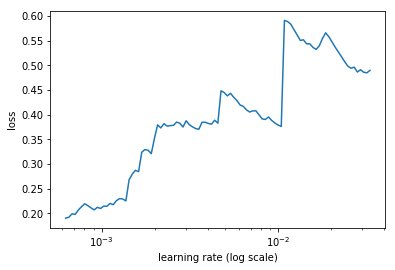

In [34]:
m.sched.plot(100)

In [35]:
lr = 1e-3


### Sample

In [73]:
m = md.get_learner(emb_szs, len(df.columns)-len(cat_vars),
                   0.04, 1, [1000,500], [0.001,0.01], y_range=y_range)

In [74]:
m.fit(lr, 3, metrics=[accuracy_thresh(.5)])

HBox(children=(IntProgress(value=0, description='Epoch', max=3), HTML(value='')))

epoch      trn_loss   val_loss   <lambda>                     
    0      0.179036   0.136865   0.811659  
    1      0.167855   0.129521   0.807175                     
    2      0.108877   0.129516   0.834081                     



[array([0.12952]), 0.8340807174887892]

In [75]:
m.fit(lr, 5, cycle_len=1, metrics=[accuracy_thresh(.5)])

HBox(children=(IntProgress(value=0, description='Epoch', max=5), HTML(value='')))

epoch      trn_loss   val_loss   <lambda>                      
    0      0.098848   0.12481    0.829596  
    1      0.126945   0.134313   0.820628                      
    2      0.066819   0.131935   0.816143                      
    3      0.080741   0.130334   0.816143                      
    4      0.071774   0.145905   0.802691                      



[array([0.1459]), 0.8026905832269267]

In [76]:
m.fit(lr, 2, cycle_len=4, metrics=[accuracy_thresh(.5)])

HBox(children=(IntProgress(value=0, description='Epoch', max=8), HTML(value='')))

epoch      trn_loss   val_loss   <lambda>                      
    0      0.065789   0.135493   0.820628  
    1      0.094497   0.150877   0.784753                      
    2      0.056295   0.158023   0.775785                      
    3      0.050328   0.160078   0.753363                      
    4      0.06653    0.161065   0.789238                      
    5      0.057952   0.163567   0.762332                      
    6      0.06045    0.165089   0.753363                      
    7      0.074011   0.166636   0.762332                      



[array([0.16664]), 0.7623318388323078]

### Test

In [87]:
m = md.get_learner(emb_szs, len(df.columns)-len(cat_vars),
                   0.04, 1, [1000,500], [0.001,0.01], y_range=y_range)
lr = 1e-4

In [88]:
m.fit(lr, 2, metrics=[accuracy_thresh(.5)])

HBox(children=(IntProgress(value=0, description='Epoch', max=2), HTML(value='')))

epoch      trn_loss   val_loss   <lambda>                     
    0      0.15497    0.136249   0.807175  
    1      0.156678   0.13942    0.816143                     



[array([0.13942]), 0.816143498025133]

In [89]:
m.fit(lr, 2, cycle_len=3, metrics=[accuracy_thresh(.5)])

HBox(children=(IntProgress(value=0, description='Epoch', max=6), HTML(value='')))

epoch      trn_loss   val_loss   <lambda>                     
    0      0.149316   0.136327   0.816143  
    1      0.15885    0.135135   0.816143                     
    2      0.12985    0.134018   0.811659                     
    3      0.142433   0.133831   0.816143                     
    4      0.113109   0.131301   0.820628                     
    5      0.122596   0.130934   0.820628                      



[array([0.13093]), 0.820627802690583]

In [90]:
m.save('val0')

In [91]:
m.load('val0')

In [92]:
x,y=m.predict_with_targs()

In [93]:
pred_test=m.predict(True)

RuntimeError: running_mean should contain 2 elements not 1

In [49]:
pred_test = np.exp(pred_test)

NameError: name 'pred_test' is not defined

In [192]:
joined_test['Survived']=pred_test

In [193]:
csv_fn=f'{PATH}tmp/sub.csv'

In [200]:
joined_test[['PassengerId','Survived']].to_csv(csv_fn, index=False)

In [202]:
FileLink(csv_fn)

/home/ubuntu/fastai/courses/dl1/data/rossmann/tmp/sub.csv

## RF

In [101]:
from sklearn.ensemble import RandomForestRegressor

In [102]:
((val,trn), (y_val,y_trn)) = split_by_idx(val_idx, df.values, yl)

In [103]:
m = RandomForestRegressor(n_estimators=40, max_features=0.99, min_samples_leaf=2,
                          n_jobs=-1, oob_score=True)
m.fit(trn, y_trn);

In [104]:
preds = m.predict(val)
m.score(trn, y_trn), m.score(val, y_val), m.oob_score_, exp_rmspe(preds, y_val)

(0.98086411192483902,
 0.92614447508562714,
 0.9193358549649463,
 0.11557443993375387)